In [79]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load the data

In [80]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [81]:
y.shape, tx.shape

((10000,), (10000, 2))

# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [4]:
def compute_loss_mse(y, tx, w):
    """Calculate the loss.
    You can calculate the loss using mse or mae.
    """
    y = np.array([y]).T.reshape([len(y), 1])
    w = np.array([w]).T.reshape([len(w), 1])
    
    e = y - np.matmul(tx,w) 
    
    return (1/y.shape[0]) * (e.T.dot(e))


# 2 Grid Search

Fill in the function `grid_search()` below:

In [5]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    
    for i in range(0, w0.shape[0]):
        for j in range(0, w1.shape[0]):
            losses[i, j] = compute_loss_mse(y, tx, np.array([[w0[i]], [w1[j]]]))
    
    return losses

Let us play with the grid search demo now!

[-100.          -99.3987976   -98.79759519  -98.19639279  -97.59519038
  -96.99398798  -96.39278557  -95.79158317  -95.19038076  -94.58917836
  -93.98797595  -93.38677355  -92.78557114  -92.18436874  -91.58316633
  -90.98196393  -90.38076152  -89.77955912  -89.17835671  -88.57715431
  -87.9759519   -87.3747495   -86.77354709  -86.17234469  -85.57114228
  -84.96993988  -84.36873747  -83.76753507  -83.16633267  -82.56513026
  -81.96392786  -81.36272545  -80.76152305  -80.16032064  -79.55911824
  -78.95791583  -78.35671343  -77.75551102  -77.15430862  -76.55310621
  -75.95190381  -75.3507014   -74.749499    -74.14829659  -73.54709419
  -72.94589178  -72.34468938  -71.74348697  -71.14228457  -70.54108216
  -69.93987976  -69.33867735  -68.73747495  -68.13627255  -67.53507014
  -66.93386774  -66.33266533  -65.73146293  -65.13026052  -64.52905812
  -63.92785571  -63.32665331  -62.7254509   -62.1242485   -61.52304609
  -60.92184369  -60.32064128  -59.71943888  -59.11823647  -58.51703407
  -57.

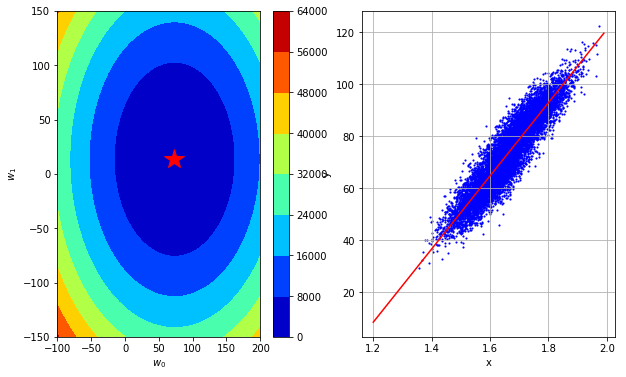

In [14]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=500)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [16]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""

    e = y - np.matmul(tx,w)
    return (-1/y.shape[0]) * np.matmul(tx.T, e)



Please fill in the functions `gradient_descent` below:

In [17]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        loss = compute_loss_mse(y, tx, w)
        grad = compute_gradient(y, tx, w)
        w = w - (gamma * grad)
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [47]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 100

gamma = 0.5

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/99): loss=[[5584.47342552]], w0=36.646961001052595, w1=6.7398562174944665
Gradient Descent(1/99): loss=[[1419.19718818]], w0=54.97044150157889, w1=10.10978432624174
Gradient Descent(2/99): loss=[[377.87812885]], w0=64.13218175184204, w1=11.794748380615387
Gradient Descent(3/99): loss=[[117.54836402]], w0=68.71305187697362, w1=12.637230407802214
Gradient Descent(4/99): loss=[[52.46592281]], w0=71.0034869395394, w1=13.058471421395629
Gradient Descent(5/99): loss=[[36.19531251]], w0=72.1487044708223, w1=13.269091928192337
Gradient Descent(6/99): loss=[[32.12765993]], w0=72.72131323646374, w1=13.374402181590693
Gradient Descent(7/99): loss=[[31.11074679]], w0=73.00761761928446, w1=13.42705730828987
Gradient Descent(8/99): loss=[[30.8565185]], w0=73.15076981069483, w1=13.453384871639459
Gradient Descent(9/99): loss=[[30.79296143]], w0=73.22234590640001, w1=13.466548653314254
Gradient Descent(10/99): loss=[[30.77707216]], w0=73.2581339542526, w1=13.473130544151651
Gradient

In [37]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=101, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

# 4 Stochastic gradient descent

In [48]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    
    return compute_gradient(y, tx, w)
    


def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
      
    initial_w = initial_w.reshape((2,1))
    
    gen = batch_iter(y, tx, batch_size)
    
    y = []
    tx = []
    for pair in gen:
        y.append(pair[0])
        tx.append(pair[1])
        
    y = np.asarray(y).T
    tx = np.asarray(tx).reshape((100,2))
    
    ws = [initial_w]
    losses = []
    w = initial_w
    
    for n_iter in range(max_iters):
        loss = compute_loss_mse(y, tx, [w[0], w[1]])
        grad = compute_stoch_gradient(y, tx, [w[0], w[1]])

        w = w - (gamma * grad)
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    return losses, ws

In [49]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 100
gamma = 0.5
batch_size = 100

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/99): loss=[[5738.18991451]], w0=[37.29974646], w1=[6.5490384]
Gradient Descent(1/99): loss=[[1442.11766525]], w0=[55.88702092], w1=[9.6906462]
Gradient Descent(2/99): loss=[[377.60687541]], w0=[65.15062919], w1=[11.19105447]
Gradient Descent(3/99): loss=[[113.78756965]], w0=[69.76809172], w1=[11.90394417]
Gradient Descent(4/99): loss=[[48.39120404]], w0=[72.07000885], w1=[12.24059479]
Gradient Descent(5/99): loss=[[32.17662515]], w0=[73.21774955], w1=[12.39841223]
Gradient Descent(6/99): loss=[[28.15520454]], w0=[73.79011141], w1=[12.47173899]
Gradient Descent(7/99): loss=[[27.15751728]], w0=[74.07559145], w1=[12.50543521]
Gradient Descent(8/99): loss=[[26.90990468]], w0=[74.21800938], w1=[12.52070513]
Gradient Descent(9/99): loss=[[26.84842378]], w0=[74.28907239], w1=[12.52750018]
Gradient Descent(10/99): loss=[[26.83315072]], w0=[74.32453895], w1=[12.53045047]
Gradient Descent(11/99): loss=[[26.82935439]], w0=[74.34224402], w1=[12.53168735]
Gradient Descent(12/99):

In [46]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=101, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

# 5 Effect of Outliers and MAE Cost Function, and Subgradient Descent

### Exercise 5

Load and plot data containing outliers

Gradient Descent(0/149): loss=[[5739.67022907]], w0=51.84746409844842, w1=7.7244264061924195
Gradient Descent(1/149): loss=[[636.5642494]], w0=67.40170332798297, w1=10.041754328050114
Gradient Descent(2/149): loss=[[177.28471123]], w0=72.06797509684336, w1=10.736952704607411
Gradient Descent(3/149): loss=[[135.9495528]], w0=73.46785662750146, w1=10.945512217574597
Gradient Descent(4/149): loss=[[132.22938854]], w0=73.88782108669889, w1=11.00808007146475
Gradient Descent(5/149): loss=[[131.89457376]], w0=74.01381042445813, w1=11.026850427631798
Gradient Descent(6/149): loss=[[131.86444042]], w0=74.0516072257859, w1=11.032481534481914
Gradient Descent(7/149): loss=[[131.86172842]], w0=74.06294626618423, w1=11.034170866536945
Gradient Descent(8/149): loss=[[131.86148434]], w0=74.06634797830372, w1=11.034677666153454
Gradient Descent(9/149): loss=[[131.86146238]], w0=74.06736849193958, w1=11.034829706038408
Gradient Descent(10/149): loss=[[131.8614604]], w0=74.06767464603033, w1=11.0348753

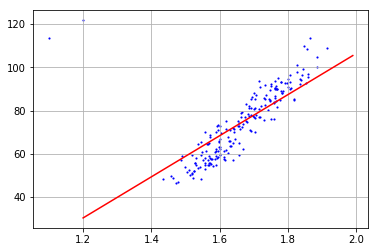

In [51]:
import matplotlib.pyplot as plt

height, weight, gender = load_data(sub_sample=True, add_outlier=True)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

plt.scatter(height, weight, marker=".", color='b', s=5)
plt.grid()


# Define the parameters of the algorithm.
max_iters = 150
gamma = 0.7
batch_size = 10

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()
w = sgd_ws[-1]
print(w)
def prediction(w0, w1, mean_x, std_x):
    """Get the regression line from the model."""
    x = np.arange(1.2, 2, 0.01)
    x_normalized = (x - mean_x) / std_x
    return x, w0 + w1 * x_normalized

pred_x, pred_y = prediction(
        w[0], w[1],
        mean_x, std_x)
print(pred_x)
print(pred_y)
plt.plot(pred_x, pred_y, 'r')

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)

In [82]:
def compute_loss_mae(y, tx, w):
    y = np.array([y]).T
    w = np.array([w]).T
    
    e = y - np.matmul(tx,w)  
    
    return (1/y.shape[0]) * (np.sum(np.abs(e), axis=0))

In [83]:
def compute_sub_gradient(y, tx, w):
    e = y - np.matmul(tx,w)

    if 0 in np.sign(e):
        print(colored('Non-deferentiable point found!', 'red'))
    
    return (1/y.shape[0]) * (np.sign(e).T).dot(-tx)


In [84]:
def sub_gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        loss = compute_loss_mae(y, tx, w)
        grad = compute_sub_gradient(y, tx, w)
        w = w - (gamma * grad)
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

In [85]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 250
gamma = 1

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
sub_gradient_losses, sub_gradient_ws = sub_gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/249): loss=[73.293922], w0=1.0, w1=-1.1596057447604836e-15
Gradient Descent(1/249): loss=[72.293922], w0=2.0, w1=-2.319211489520967e-15
Gradient Descent(2/249): loss=[71.293922], w0=3.0, w1=-3.4788172342814508e-15
Gradient Descent(3/249): loss=[70.293922], w0=4.0, w1=-4.638422979041934e-15
Gradient Descent(4/249): loss=[69.293922], w0=5.0, w1=-5.798028723802418e-15
Gradient Descent(5/249): loss=[68.293922], w0=6.0, w1=-6.9576344685629015e-15
Gradient Descent(6/249): loss=[67.293922], w0=7.0, w1=-8.117240213323385e-15
Gradient Descent(7/249): loss=[66.293922], w0=8.0, w1=-9.276845958083869e-15
Gradient Descent(8/249): loss=[65.293922], w0=9.0, w1=-1.0436451702844352e-14
Gradient Descent(9/249): loss=[64.293922], w0=10.0, w1=-1.1596057447604836e-14
Gradient Descent(10/249): loss=[63.293922], w0=11.0, w1=-1.275566319236532e-14
Gradient Descent(11/249): loss=[62.293922], w0=12.0, w1=-1.3915268937125803e-14
Gradient Descent(12/249): loss=[61.293922], w0=13.0, w1=-1.507487

In [87]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sub_gradient_losses, sub_gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=101, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

Gradient Descent(0/149): loss=[[5739.67022907]], w0=51.84746409844842, w1=7.7244264061924195
Gradient Descent(1/149): loss=[[636.5642494]], w0=67.40170332798297, w1=10.041754328050114
Gradient Descent(2/149): loss=[[177.28471123]], w0=72.06797509684336, w1=10.736952704607411
Gradient Descent(3/149): loss=[[135.9495528]], w0=73.46785662750146, w1=10.945512217574597
Gradient Descent(4/149): loss=[[132.22938854]], w0=73.88782108669889, w1=11.00808007146475
Gradient Descent(5/149): loss=[[131.89457376]], w0=74.01381042445813, w1=11.026850427631798
Gradient Descent(6/149): loss=[[131.86444042]], w0=74.0516072257859, w1=11.032481534481914
Gradient Descent(7/149): loss=[[131.86172842]], w0=74.06294626618423, w1=11.034170866536945
Gradient Descent(8/149): loss=[[131.86148434]], w0=74.06634797830372, w1=11.034677666153454
Gradient Descent(9/149): loss=[[131.86146238]], w0=74.06736849193958, w1=11.034829706038408
Gradient Descent(10/149): loss=[[131.8614604]], w0=74.06767464603033, w1=11.0348753

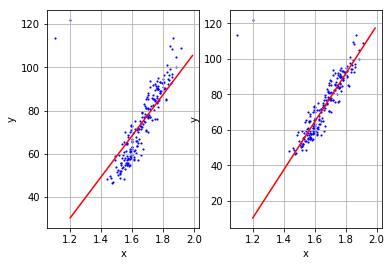

In [88]:
# compare gradient and sub_gradient decents
import matplotlib.pyplot as plt

height, weight, gender = load_data(sub_sample=True, add_outlier=True)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)


fig = plt.figure()

ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(height, weight, marker=".", color='b', s=5)
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.grid()

ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(height, weight, marker=".", color='b', s=5)
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.grid()



# Define the parameters of the algorithm.
max_iters = 150
gamma = 0.7
batch_size = 10

# Initialization
w_initial = np.array([0, 0])

def prediction(w0, w1, mean_x, std_x):
    """Get the regression line from the model."""
    x = np.arange(1.2, 2, 0.01)
    x_normalized = (x - mean_x) / std_x
    return x, w0 + w1 * x_normalized

# Start GD.
start_time = datetime.datetime.now()
gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()
wgd = gd_ws[-1]

pred_x, pred_y = prediction(
        wgd[0], wgd[1],
        mean_x, std_x)

ax1.plot(pred_x, pred_y, 'r')

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = sub_gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()
wsgd = sgd_ws[-1]

pred_x, pred_y = prediction(
        wsgd[0], wsgd[1],
        mean_x, std_x)

ax2.plot(pred_x, pred_y, 'r')

Stochastic Sub_Gradiant_Descent with MAE

In [89]:
def compute_stoch_sub_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    
    return compute_sub_gradient(y, tx, w)
    


def stochastic_sub_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
      
    gen = batch_iter(y, tx, batch_size)
    
    y = []
    tx = []
    for pair in gen:
        y.append(pair[0])
        tx.append(pair[1])
        
    y = np.asarray(y).T.reshape(100)
    tx = np.asarray(tx).reshape((100,2))
    
    ws = [initial_w]
    losses = []
    w = initial_w
    
    for n_iter in range(max_iters):
        loss = compute_loss_mae(y, tx, w)
        grad = compute_stoch_sub_gradient(y, tx, w)

        w = w - (gamma * grad)
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    return losses, ws

In [90]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 250
gamma = 1
batch_size = 100

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
ssgd_losses, ssgd_ws = stochastic_sub_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/249): loss=[72.82343501], w0=1.0, w1=0.011982539511440895
Gradient Descent(1/249): loss=[71.82329143], w0=2.0, w1=0.02396507902288179
Gradient Descent(2/249): loss=[70.82314785], w0=3.0, w1=0.035947618534322684
Gradient Descent(3/249): loss=[69.82300427], w0=4.0, w1=0.04793015804576358
Gradient Descent(4/249): loss=[68.82286068], w0=5.0, w1=0.05991269755720448
Gradient Descent(5/249): loss=[67.8227171], w0=6.0, w1=0.07189523706864537
Gradient Descent(6/249): loss=[66.82257352], w0=7.0, w1=0.08387777658008626
Gradient Descent(7/249): loss=[65.82242994], w0=8.0, w1=0.09586031609152715
Gradient Descent(8/249): loss=[64.82228636], w0=9.0, w1=0.10784285560296804
Gradient Descent(9/249): loss=[63.82214278], w0=10.0, w1=0.11982539511440893
Gradient Descent(10/249): loss=[62.8219992], w0=11.0, w1=0.13180793462584983
Gradient Descent(11/249): loss=[61.82185562], w0=12.0, w1=0.14379047413729074
Gradient Descent(12/249): loss=[60.82171203], w0=13.0, w1=0.15577301364873164
Gradi

In [91]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        ssgd_losses, ssgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=101, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>